# AAI614: Data Science & its Applications

*Notebook 7.2: Accelerating Data Science*

<a href="https://colab.research.google.com/github/gassaf2/AAI614_assaf/blob/main/week7/Notebook7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: Data Science with Python and Dask

### Examining the Metadata of Dask Objects

You would need for this lab to downlaod the data and store on your local disk as it is arond 2GB with 42.3M Rows of Parking Ticket Data.  The data can be downloaded from [Kaggle](http://www.kaggle.com/new-york-city/nyc-parking-tickets/)

In [4]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df = dd.read_csv('./nyc-parking-tickets/*2017.csv')
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=32,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,string,string,string,int64,int64,int64,int64,float64,int64,int64,int64,string,string,string,float64,string,string,float64,string,string,int64,int64,string,string,string,string,string,string,float64,int64,string,int64,string,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: to_pyarrow_string, 6 graph layers

In [6]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 11 graph layers

### Running Computations with the Compute Method

In [10]:


# Specify the dtypes for problematic columns
dtype_dict = {
    'House Number': 'object',
    'Time First Observed': 'object',
}

# Read the CSV with specified dtypes
df = dd.read_csv('./nyc-parking-tickets/*2017.csv', dtype=dtype_dict)

# Compute the missing count
with ProgressBar():
    missing_count_pct = df.isnull().sum() / len(df) * 100

missing_count_pct.compute()
#with ProgressBar():
#    missing_count_pct = missing_count.compute()
#missing_count_pct

[##########                              ] | 27% Completed | 36.24 ss

C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\io\csv.py:197: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 50.80 s


C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\io\csv.py:197: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Summons Number                         0.000000
Plate ID                               0.006739
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.395361
Vehicle Make                           0.676199
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    19.183510
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        19.093212
Issuer Squad                          19.101506
Violation Time                         0.000583
Time First Observed                   92

In [12]:
columns_to_drop = missing_count_pct[missing_count_pct > 60].index

from dask.diagnostics import ProgressBar

valid_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()

C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\io\csv.py:197: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


ValueError: Metadata inference failed in `drop_by_shallow_copy`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
KeyError("['a', <NA>] not found in axis")

Traceback:
---------
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\utils.py", line 193, in raise_on_meta_error
    yield
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\core.py", line 6968, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\dask\dataframe\utils.py", line 776, in drop_by_shallow_copy
    df2.drop(columns=columns, inplace=True, errors=errors)
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\pandas\core\frame.py", line 5568, in drop
    return super().drop(
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\pandas\core\generic.py", line 4782, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\pandas\core\generic.py", line 4824, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "C:\Users\gassaf\.conda\envs\conda_lau310\lib\site-packages\pandas\core\indexes\base.py", line 7069, in drop
    raise KeyError(f"{labels[mask].tolist()} not found in axis")


### Visualizing a Simple DAG using Dask Delayed Objects

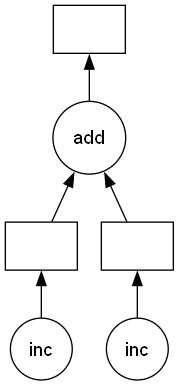

In [13]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Visualizing More Complex DAGs with Loops and Collections

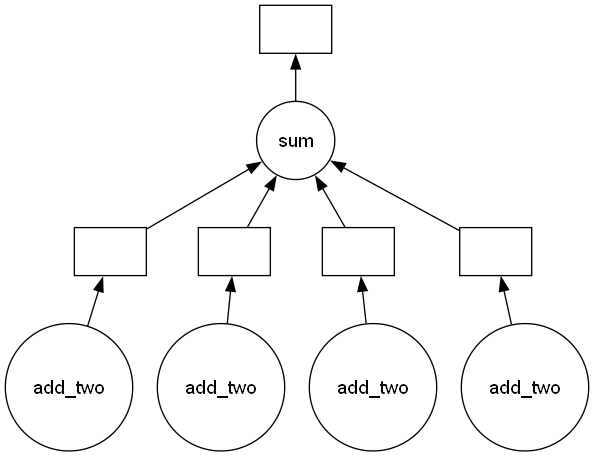

In [14]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

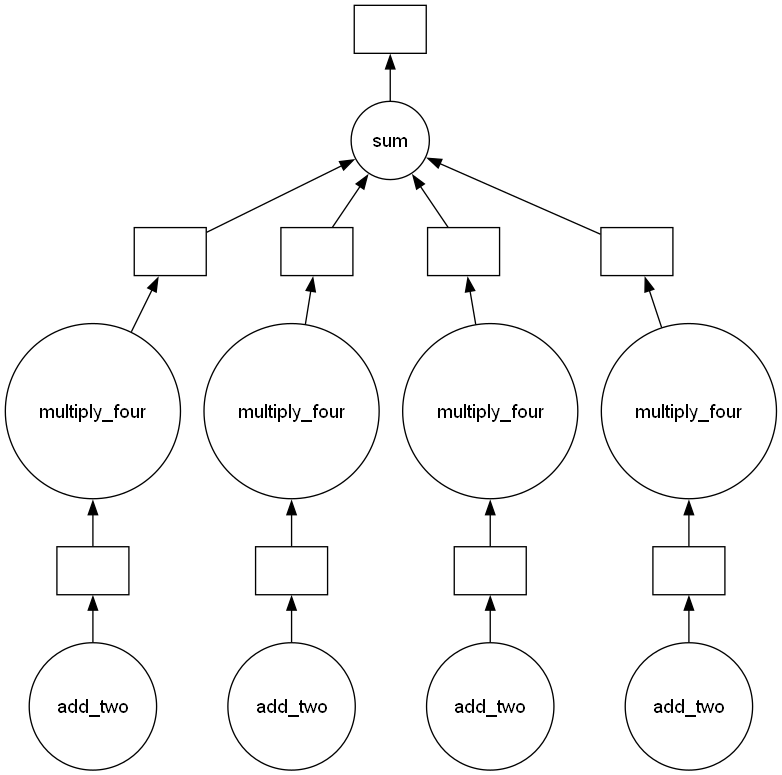

In [15]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

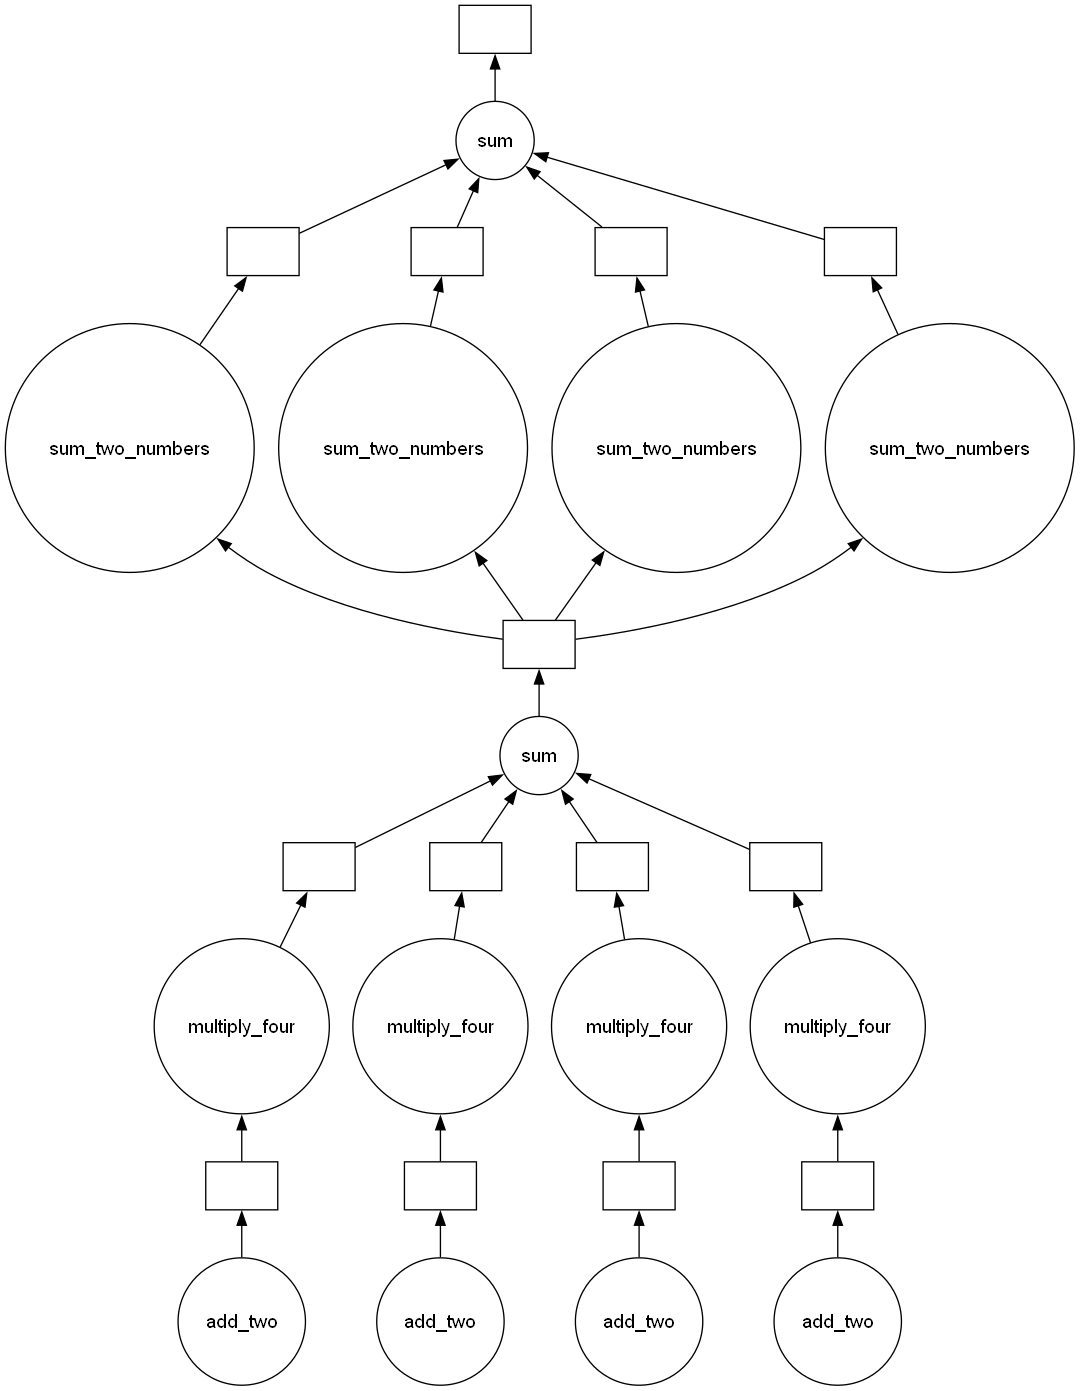

In [16]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

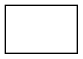

In [17]:
total_persisted = total.persist()
total_persisted.visualize()

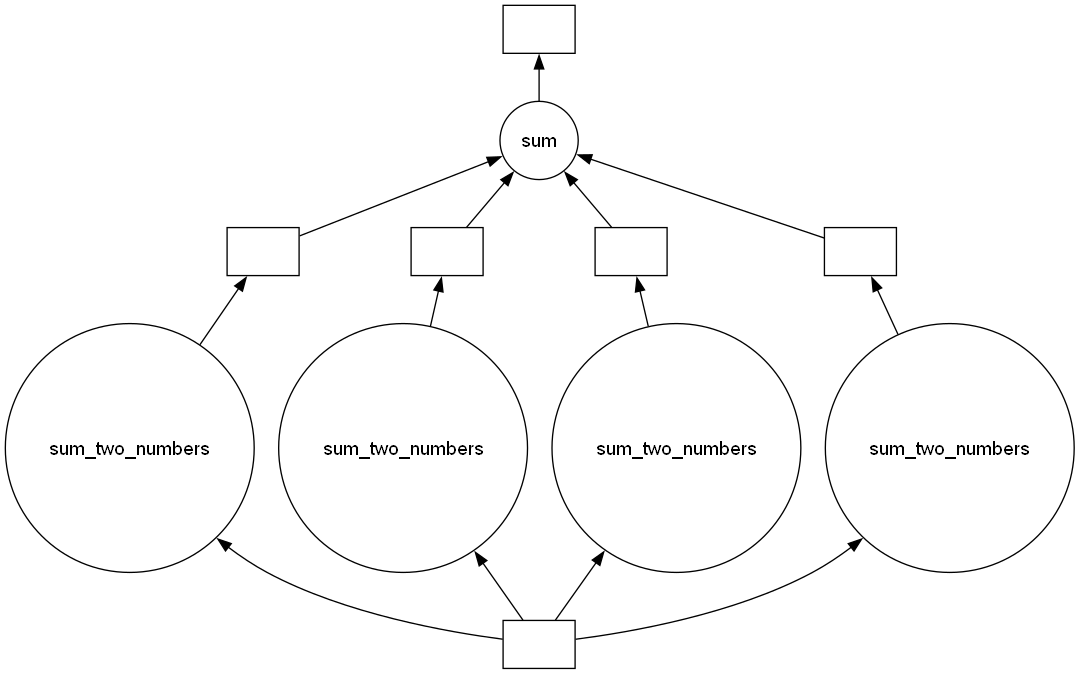

In [18]:
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

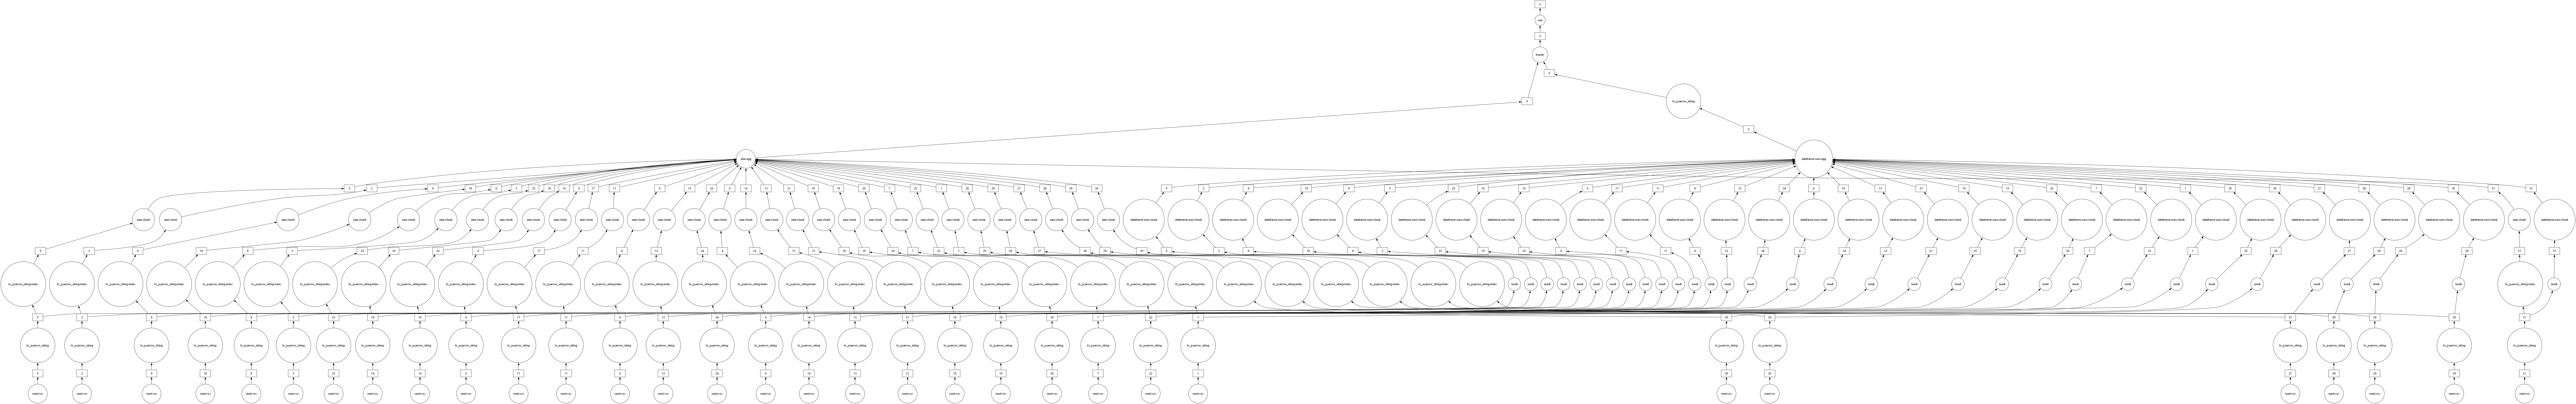

In [19]:
missing_count.visualize()